# Data Understanding

**Project:** Aadhaar Enrolment Coverage Gap Analysis  

## Objective
- Understand the structure of Aadhaar enrolment datasets  
- Identify key columns related to geography, demographics, and time  
- Assess data quality before cleaning and analysis  



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

print("Notebook initialized")



Notebook initialized


In [5]:
enrol = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\enrol_cleaned.csv"
)

demo = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\demo_cleaned.csv"
)


print("Enrollment dataset shape:", enrol.shape)
print("Demographic update dataset shape:", demo.shape)




Enrollment dataset shape: (8037, 7)
Demographic update dataset shape: (13601, 6)


In [6]:
print("Enrollment Dataset Columns:")
display(enrol.columns)

print("\nEnrollment Dataset Info:")
enrol.info()

print("\nMissing Values in Enrollment Dataset:")
display(enrol.isna().sum())

print("\nDemographic Update Dataset Columns:")
display(demo.columns)

print("\nDemographic Update Dataset Info:")
demo.info()

print("\nMissing Values in Demographic Update Dataset:")
display(demo.isna().sum())




Enrollment Dataset Columns:


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


Enrollment Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            8037 non-null   object
 1   state           8037 non-null   object
 2   district        8037 non-null   object
 3   pincode         8037 non-null   int64 
 4   age_0_5         8037 non-null   int64 
 5   age_5_17        8037 non-null   int64 
 6   age_18_greater  8037 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 439.7+ KB

Missing Values in Enrollment Dataset:


date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64


Demographic Update Dataset Columns:


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17'], dtype='object')


Demographic Update Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13891 entries, 0 to 13890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           13891 non-null  object
 1   state          13891 non-null  object
 2   district       13891 non-null  object
 3   pincode        13891 non-null  int64 
 4   demo_age_5_17  13891 non-null  int64 
 5   demo_age_17    13891 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 651.3+ KB

Missing Values in Demographic Update Dataset:


date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17      0
dtype: int64

In [3]:

# ## Pune Aadhaar Monthly Enrolment Analysis
# This notebook analyzes Aadhaar monthly enrolment totals for Pune (or wards if available),
# identifies peaks and dips, and visualizes trends.

# In[1]:
# Import required libraries
# Install matplotlib and seaborn in the notebook
!pip install matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')


In [6]:
# In[2]:
# Load the Aadhaar Monthly Enrolment CSV
# Replace 'aadhaar_monthly_pune.csv' with your CSV file path
enrolment_data = enrol

# Inspect the data
print("First 5 rows of the dataset:")
display(enrolment_data.head())

print("\nDataset Info:")
enrolment_data.info()

First 5 rows of the dataset:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-01-09,Maharashtra,Pune,410504,3,0,0
1,2025-01-09,Maharashtra,Pune,411002,1,0,0
2,2025-01-09,Maharashtra,Pune,411003,1,1,0
3,2025-01-09,Maharashtra,Pune,411004,1,0,0
4,2025-01-09,Maharashtra,Pune,411006,1,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            2851 non-null   object
 1   state           8037 non-null   object
 2   district        8037 non-null   object
 3   pincode         8037 non-null   int64 
 4   age_0_5         8037 non-null   int64 
 5   age_5_17        8037 non-null   int64 
 6   age_18_greater  8037 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 439.7+ KB


In [8]:
# In[3]:
# Make sure 'Month' column is datetime type
# Replace 'Month' with your actual column name
# Convert 'date' column to datetime type
enrolment_data['date'] = pd.to_datetime(enrolment_data['date'], format='%Y-%m-%d')

# Optional: sort by date
enrolment_data = enrolment_data.sort_values('date')

# If you want to aggregate monthly, create a 'Month' column
enrolment_data['Month'] = enrolment_data['date'].dt.to_period('M')

# Optional: sort by month
enrolment_data = enrolment_data.sort_values('date')


In [10]:
# In[4]:
# Aggregate monthly enrolment totals
# Replace 'Enrolments' with your actual column name for total enrolments
# Sum all age groups to get total enrolments per row
enrolment_data['Total_Enrolments'] = enrolment_data[['age_0_5','age_5_17','age_18_greater']].sum(axis=1)

# Aggregate total enrolments per month
monthly_totals = enrolment_data.groupby('Month')['Total_Enrolments'].sum().reset_index()

# Display monthly totals
display(monthly_totals)

,Month,Total_Enrolments
0,2025-01,6629
1,2025-02,1124
2,2025-03,568
3,2025-04,349
4,2025-05,567
5,2025-06,370
6,2025-07,436
7,2025-08,761
8,2025-09,1433
9,2025-10,1358


In [14]:
#In[5]
# Compute Month-over-Month growth percentage
monthly_totals['MoM_Growth_%'] = monthly_totals['Total_Enrolments'].pct_change() * 100

display(monthly_totals)


,Month,Total_Enrolments,MoM_Growth_%
0,2025-01,6629,NaN
1,2025-02,1124,-83.044200
2,2025-03,568,-49.466192
3,2025-04,349,-38.556338
4,2025-05,567,62.464183
5,2025-06,370,-34.744268
6,2025-07,436,17.837838
7,2025-08,761,74.541284
8,2025-09,1433,88.304862
9,2025-10,1358,-5.233775


In [16]:
print(monthly_totals.dtypes)


Month               period[M]
Total_Enrolments        int64
MoM_Growth_%          float64
dtype: object


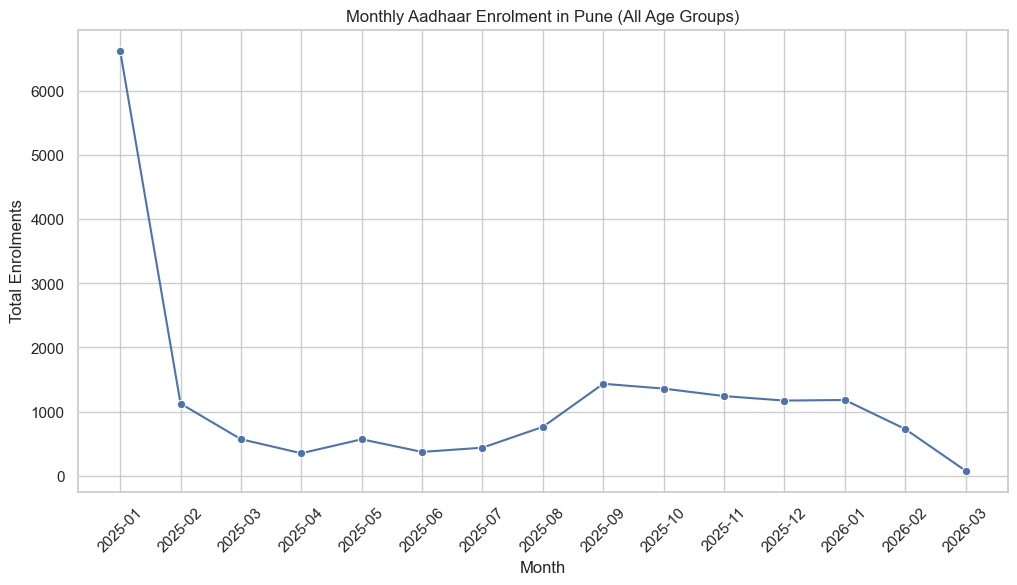

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_totals, 
    x=monthly_totals['Month'].astype(str),  # convert period to string
    y='Total_Enrolments', 
    marker='o'
)
plt.title("Monthly Aadhaar Enrolment in Pune (All Age Groups)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


C:\Users\Tanaya\AppData\Local\Temp\ipykernel_54084\3737423048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


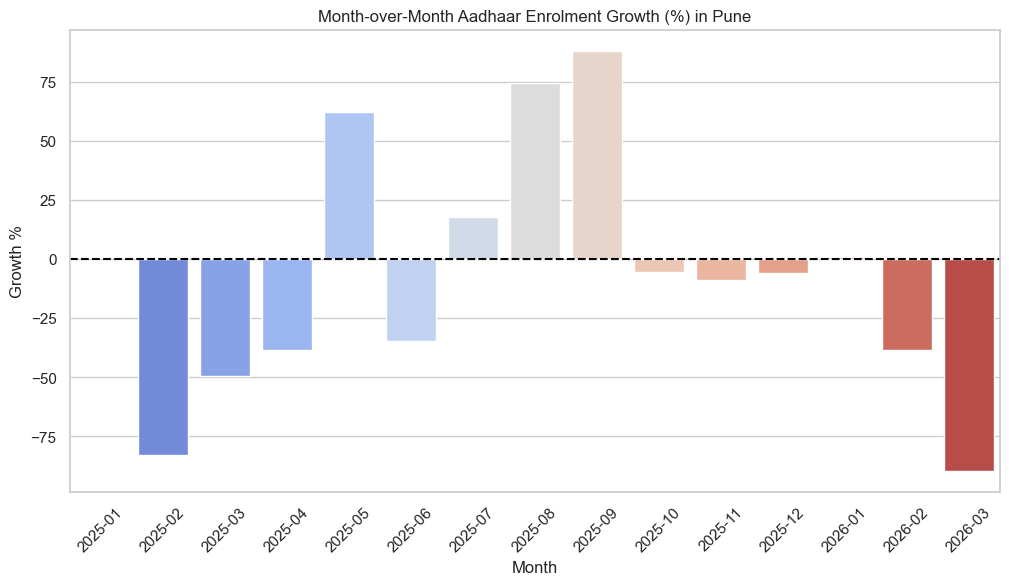

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=monthly_totals, 
    x=monthly_totals['Month'].astype(str), 
    y='MoM_Growth_%', 
    palette='coolwarm'
)
plt.title("Month-over-Month Aadhaar Enrolment Growth (%) in Pune")
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.show()
